In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt

### Set seed for random number generator
Setting the seed number will result in reproducable output. Therefore, the effects of changing anything but the model can be compared.

In [2]:
from numpy.random import seed
seed(1)

# Loading the data

### The MNIST dataset is structured as follows:

    -785 columns
    -First column = class_label
    -Each column after represents one pixel value (784 total for a 28 x 28 image)

In [3]:
# Data params
train_file = "./data/emnist-balanced-train.csv"
test_file = "./data/emnist-balanced-test.csv"

classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [4]:
num_classes = len(classes) 
img_size = 28

def img_label_load(data_path, num_classes=None):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # Assuming 28x28 images
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3])
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels

## Model evaluation

In [16]:
## Evaluate model with the test dataset
def evaluate_model(model, x_test, y_test):
    result = model.evaluate(x_test, y_test)
    return "The accuracy of the model is: " + str(result[1]) + " The loss of the model is: " + str(result[0])

In [6]:
## Plot the training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Training accuracy')

    plt.plot(epochs, val_loss, 'ro', label='Validation loss')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## Reading data for training

In [7]:
x_train, y_train = img_label_load(train_file)

In [8]:
print(x_train.shape)
print(y_train.shape)

(112800, 28, 28, 1)
(112800, 47)


## Reading data for testing

In [9]:
x_test, y_test = img_label_load(test_file)

In [10]:
print(x_test.shape)
print(y_test.shape)

(18800, 28, 28, 1)
(18800, 47)


# Starting off with a simple model

In [11]:
def create_basic_model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training the basic model

In [13]:
batch_size = 128

basic_model = create_basic_model()
basic_history = basic_model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 10,
          validation_split = 0.2)

Train on 90240 samples, validate on 22560 samples
Epoch 1/10
90240/90240 [==============================] - 9s 104us/sample - loss: 0.8027 - accuracy: 0.7592 - val_loss: 0.4985 - val_accuracy: 0.8333
Epoch 2/10
90240/90240 [==============================] - 6s 72us/sample - loss: 0.4322 - accuracy: 0.8554 - val_loss: 0.4304 - val_accuracy: 0.8498
Epoch 3/10
90240/90240 [==============================] - 7s 75us/sample - loss: 0.3461 - accuracy: 0.8788 - val_loss: 0.4094 - val_accuracy: 0.8588
Epoch 4/10
90240/90240 [==============================] - 7s 73us/sample - loss: 0.2869 - accuracy: 0.8948 - val_loss: 0.4325 - val_accuracy: 0.8550
Epoch 5/10
90240/90240 [==============================] - 6s 71us/sample - loss: 0.2374 - accuracy: 0.9104 - val_loss: 0.4292 - val_accuracy: 0.8537
Epoch 6/10
90240/90240 [==============================] - 6s 71us/sample - loss: 0.1939 - accuracy: 0.9241 - val_loss: 0.4679 - val_accuracy: 0.8534
Epoch 7/10
90240/90240 [==============================]

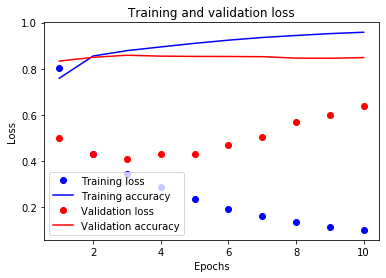

In [14]:
plot_history(basic_history)

In [17]:
evaluate_model(basic_model, x_test, y_test)

18800/18800 [==============================] - 2s 93us/sample - loss: 0.6673 - accuracy: 0.8468


'The accuracy of the model is: 0.8467553 The loss of the model is: 0.667293496559909'

As seen above, the model can’t generalize on the training dataset well, because the result on the validation data is not similar. I will add batch normalization after each convolution.

## Creating another model with batch normalization after each convolution layer

In [19]:
def create_basic_model_with_reg():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu', input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training the with added batch normalization model

In [21]:
batch_size = 128

basic_model_reg = create_basic_model_with_reg()
basic_reg_history = basic_model_reg.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 10,
          validation_split = 0.2)

Train on 90240 samples, validate on 22560 samples
Epoch 1/10
90240/90240 [==============================] - 9s 100us/sample - loss: 0.8203 - accuracy: 0.7588 - val_loss: 0.5556 - val_accuracy: 0.8116
Epoch 2/10
90240/90240 [==============================] - 8s 87us/sample - loss: 0.3925 - accuracy: 0.8629 - val_loss: 0.4720 - val_accuracy: 0.8392
Epoch 3/10
90240/90240 [==============================] - 8s 84us/sample - loss: 0.2749 - accuracy: 0.8969 - val_loss: 0.5527 - val_accuracy: 0.8297
Epoch 4/10
90240/90240 [==============================] - 8s 86us/sample - loss: 0.2060 - accuracy: 0.9192 - val_loss: 0.5567 - val_accuracy: 0.8395
Epoch 5/10
90240/90240 [==============================] - 8s 84us/sample - loss: 0.1663 - accuracy: 0.9337 - val_loss: 0.6777 - val_accuracy: 0.8287
Epoch 6/10
90240/90240 [==============================] - 8s 84us/sample - loss: 0.1430 - accuracy: 0.9424 - val_loss: 0.7481 - val_accuracy: 0.8201
Epoch 7/10
90240/90240 [==============================]

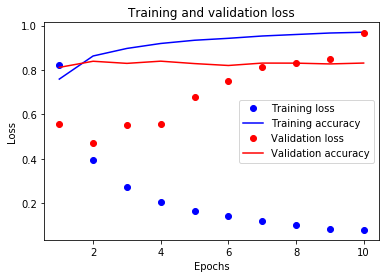

In [22]:
plot_history(basic_reg_history)

In [24]:
evaluate_model(basic_model_reg, x_test, y_test)

18800/18800 [==============================] - 2s 102us/sample - loss: 1.0128 - accuracy: 0.8319


'The accuracy of the model is: 0.8319149 The loss of the model is: 1.0127841240611481'

The testing result has more variance in it. So adding dropout layers might help.

## Creating another model with added dropout regularization

In [25]:
def create_basic_model_with_reg2():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu', input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training the model with dropout regularization

In [26]:
batch_size = 128

basic_model_reg2 = create_basic_model_with_reg2()
basic_reg2_history = basic_model_reg2.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 10,
          validation_split = 0.2)

Train on 90240 samples, validate on 22560 samples
Epoch 1/10
90240/90240 [==============================] - 11s 116us/sample - loss: 0.9363 - accuracy: 0.7303 - val_loss: 0.5268 - val_accuracy: 0.8249
Epoch 2/10
90240/90240 [==============================] - 9s 99us/sample - loss: 0.4871 - accuracy: 0.8350 - val_loss: 0.4556 - val_accuracy: 0.8437
Epoch 3/10
90240/90240 [==============================] - 9s 102us/sample - loss: 0.4033 - accuracy: 0.8582 - val_loss: 0.4234 - val_accuracy: 0.8545
Epoch 4/10
90240/90240 [==============================] - 9s 100us/sample - loss: 0.3594 - accuracy: 0.8690 - val_loss: 0.4358 - val_accuracy: 0.8543
Epoch 5/10
90240/90240 [==============================] - 10s 112us/sample - loss: 0.3257 - accuracy: 0.8784 - val_loss: 0.4333 - val_accuracy: 0.8520
Epoch 6/10
90240/90240 [==============================] - 9s 102us/sample - loss: 0.3001 - accuracy: 0.8866 - val_loss: 0.4139 - val_accuracy: 0.8596
Epoch 7/10
90240/90240 [=========================

### Plotting the history of both models and comparing them

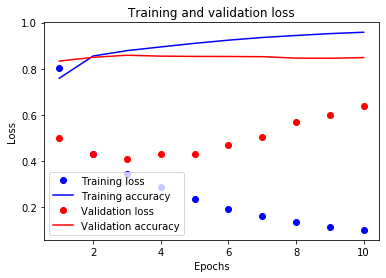

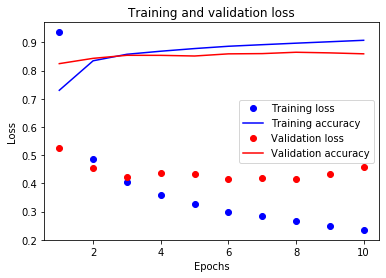

In [27]:
plot_history(basic_history)
plot_history(basic_reg2_history)

In [30]:
evaluate_model(basic_model_reg2, x_test, y_test)

18800/18800 [==============================] - 2s 103us/sample - loss: 0.4674 - accuracy: 0.8606


'The accuracy of the model is: 0.8605851 The loss of the model is: 0.4673503104105909'

The variance dropped and the accuracy went up. It gives a similar result as the first, but with better validation, and test results. The problem might be the too shallow network. 

## Creating a deep and complex neural network

In [31]:
def create_complex_model(input_size, output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

### Training the model 

In [32]:
batch_size = 64

complex_model = create_complex_model([img_size, img_size,1],len(classes))
complex_history = complex_model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 15,
          validation_split = 0.1)

Train on 101520 samples, validate on 11280 samples
Epoch 1/15
101520/101520 [==============================] - 21s 204us/sample - loss: 0.8928 - accuracy: 0.7321 - val_loss: 0.4044 - val_accuracy: 0.8542
Epoch 2/15
101520/101520 [==============================] - 18s 179us/sample - loss: 0.4777 - accuracy: 0.8364 - val_loss: 0.3538 - val_accuracy: 0.8734
Epoch 3/15
101520/101520 [==============================] - 18s 177us/sample - loss: 0.4230 - accuracy: 0.8520 - val_loss: 0.3410 - val_accuracy: 0.8713
Epoch 4/15
101520/101520 [==============================] - 18s 177us/sample - loss: 0.3936 - accuracy: 0.8604 - val_loss: 0.3435 - val_accuracy: 0.8735
Epoch 5/15
101520/101520 [==============================] - 18s 179us/sample - loss: 0.3740 - accuracy: 0.8666 - val_loss: 0.3122 - val_accuracy: 0.8832
Epoch 6/15
101520/101520 [==============================] - 18s 177us/sample - loss: 0.3557 - accuracy: 0.8720 - val_loss: 0.3111 - val_accuracy: 0.8820
Epoch 7/15
101520/101520 [=====

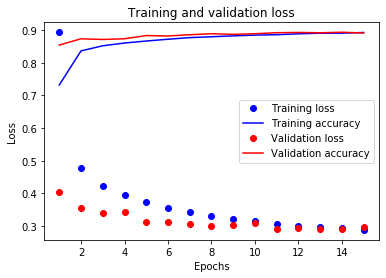

In [33]:
plot_history(complex_history)

It has the best results so far. The deeper network did a good job.

## Conclusion
    Training convolutional neural networks is a random process. This makes experiments difficult because each time you run the same experiment, you get different results. Therefore, you must run your experiments dozens of times and take an average. And adding batch normalizaiton and data augmentation improve the CNN. For my experiment I didnt add data augmentation for the training of the complex model.